##**PROYECTO FINAL**


PASO 1: IMPORTAR LIBRERIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

PASO 2: IMPORTAR DATOS

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df_titan = df.copy()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Dimensiones:", df_titan.shape)
display(df_titan)



Dimensiones: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


análisis de cada columna del dataset del Titanic:
- PassengerId: Identificador único para cada pasajero. No aporta información predictiva directa, pero sirve para rastrear registros.
- Survived: Variable objetivo (target), indica si el pasajero sobrevivió (1) o no (0).
- Pclass: Clase socioeconómica del pasajero (1 = alta, 2 = media, 3 = baja). Influye en acceso a recursos y probabilidad de supervivencia.
- Name: Nombre completo del pasajero. Puede usarse para extraer títulos (Mr, Mrs, Miss), útiles para inferir edad o género.
- Sex: Sexo del pasajero (male/female). Es una variable clave en el análisis de supervivencia.
- Age: Edad del pasajero. Permite segmentar por grupos etarios y analizar vulnerabilidad.
- SibSp: Número de hermanos o cónyuges a bordo. Ayuda a identificar si viajaba en grupo familiar.
- Parch: Número de padres o hijos a bordo. Complementa el análisis de estructura familiar.
- Ticket: Número de boleto. Puede contener patrones útiles si se agrupan por tipo o prefijo.
- Fare: Tarifa pagada por el pasajero. Relacionada con clase y poder adquisitivo.
- Cabin: Número de cabina asignada. Puede indicar ubicación en el barco, aunque tiene muchos valores faltantes.
- Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Puede reflejar diferencias regionales o socioeconómicas.

Este conjunto de variables permite construir modelos predictivos sólidos sobre la supervivencia, combinando factores demográficos, económicos y logísticos.


PASO 3: REVISAR NAN

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== ESTADÍSTICOS DESCRIPTIVOS ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838  

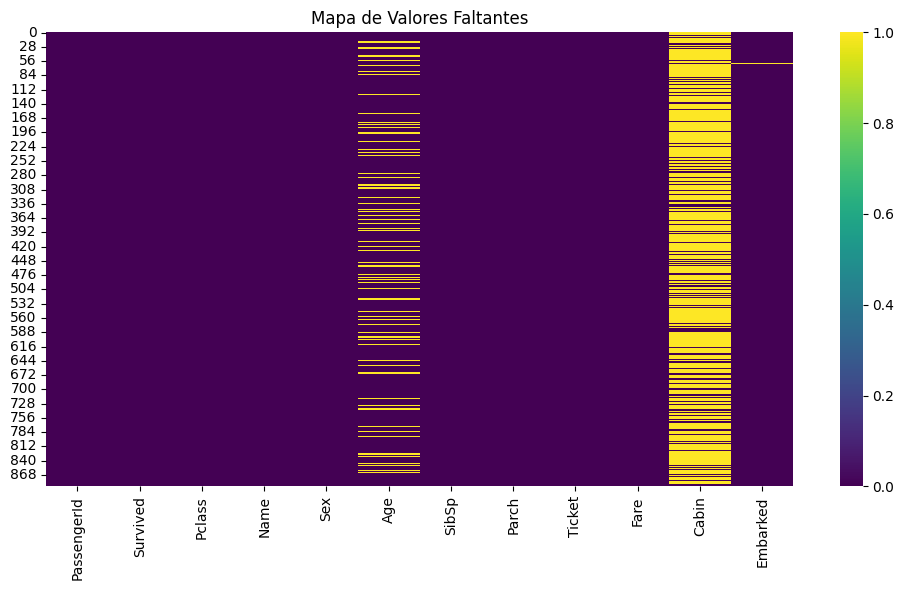

In [4]:
# === INFORMACIÓN GENERAL DEL DATASET ===
print("=== INFORMACIÓN DEL DATASET ===")
print(df_titan.info())

# === ESTADÍSTICOS DESCRIPTIVOS ===
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(df_titan.describe())

# === VALORES FALTANTES ===
print("\n=== VALORES FALTANTES POR COLUMNA ===")
print(df_titan.isna().sum())

# === MAPA DE VALORES FALTANTES ===
plt.figure(figsize=(10, 6))
sns.heatmap(df_titan.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

**¿Cuántos valores faltantes hay por columna?**
- Age: 177 valores faltantes
- Cabin: 687 valores faltantes
- Embarked: 2 valores faltantes

**¿Qué porcentaje del total representan?**
El dataset tiene 891 registros, así que:
- a Age le faltan 177 entonces haciendo calculos en cuanto a porcentaje es el 19.86%
- Cabin le faltan 687 que en porcentaje son 77.11%
- Embarked son solo 2 que representa un 0.22%

**¿Hay patrones en los valores faltantes?**

Sí, se observan patrones claros:
- Cabin tiene una gran cantidad de valores faltantes, lo que sugiere que muchos pasajeros no tenían cabina asignada (probablemente de tercera clase).
- Age tiene una proporción significativa de NaN, posiblemente por falta de registro en ciertos grupos (niños, mujeres, etc.).
- Embarked solo tiene 2 faltantes, lo que indica un error puntual más que un patrón.

El heatmap confirma que los NaN están concentrados en esas tres columnas, especialmente en Cabin.








PASO 4: LIMPIAR DATOS

In [5]:
# Eliminar duplicados
df_titan = df_titan.drop_duplicates()
# Eliminar filas con NaN (opcional)
# df_titan = df_titan.dropna()

# Rellenar con mediana (variables numéricas)
for col in df_titan.select_dtypes(include=[np.number]).columns:
    if df_titan[col].isna().sum() > 0:
        df_titan[col].fillna(df_titan[col].median(), inplace=True)

# Rellenar con moda (variables categóricas)
for col in df_titan.select_dtypes(include=['object']).columns:
    if df_titan[col].isna().sum() > 0:
        df_titan[col].fillna(df_titan[col].mode()[0], inplace=True)
# Verificar limpieza
print("Valores faltantes después de limpieza:")
print(df_titan.isna().sum())

Valores faltantes después de limpieza:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


La estrategia de limpieza aplicada al dataset df_titan consistió en tres pasos clave:
####- Eliminación de duplicados:
- Se eliminaron registros repetidos para evitar sesgos en el análisis y asegurar que cada fila represente un pasajero único.
####- Tratamiento de valores faltantes:
- Para variables numéricas como Age, se usó imputación con la mediana, ya que es robusta frente a outliers y conserva la distribución central de los datos.
- Para variables categóricas como Embarked y Cabin, se usó imputación con la moda, lo que permite mantener la categoría más frecuente sin distorsionar el análisis.
####- Verificación final:
- Se comprobó que no quedaran valores faltantes en ninguna columna, dejando el dataset listo para modelado sin errores por datos incompletos.

Esta estrategia es eficiente porque conserva la mayor cantidad de información posible sin eliminar registros valiosos, y prepara el dataset para algoritmos de machine learning que no toleran valores nulos.


PASO 5: Visualizaciones

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

num_cols = df_titan.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_titan.select_dtypes(include=['object','category']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


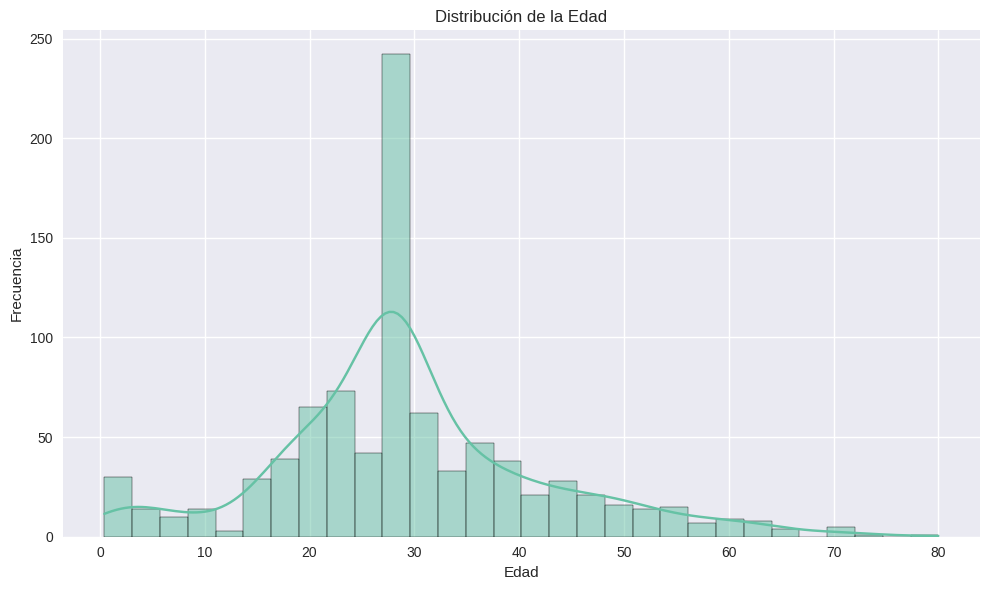

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_titan['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


- La gráfica muestra un histograma con curva de densidad que representa la distribución de edades de los pasajeros del Titanic.

- Se observa una concentración alta entre los 20 y 40 años, con un pico alrededor de los 30.

- Esta tendencia indica que la mayoría de los pasajeros eran adultos jóvenes, lo cual puede influir en el análisis de supervivencia y en la segmentación por grupos etarios.

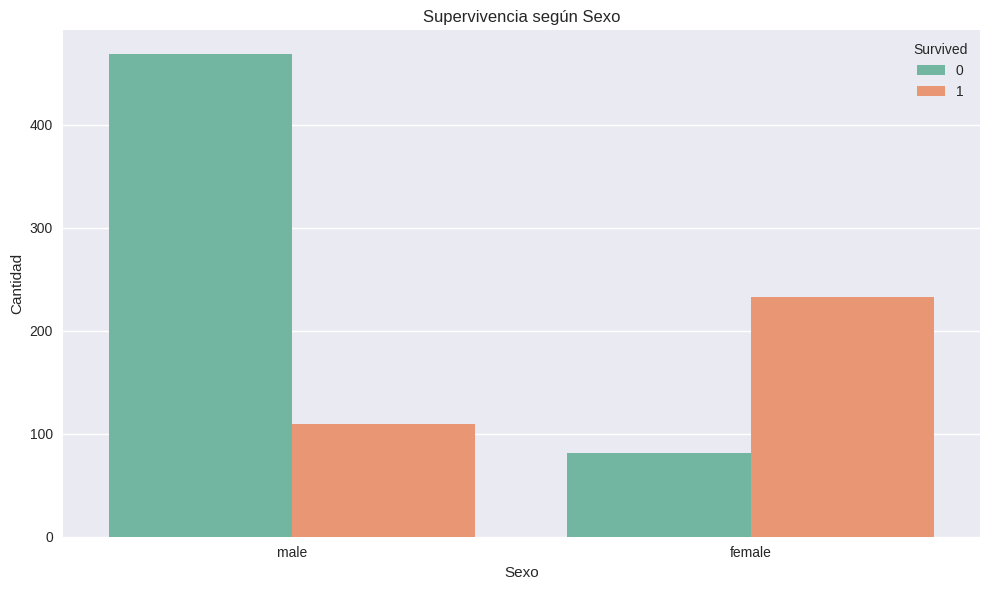

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_titan, x='Sex', hue='Survived')
plt.title('Supervivencia según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

- La gráfica muestra la cantidad de pasajeros según su sexo, evidenciando que hay significativamente más hombres que mujeres en el dataset.
- Entre los hombres, la mayoría no sobrevivió, mientras que entre las mujeres, la mayoría sí lo hizo.
- Esta diferencia sugiere que el sexo fue un factor determinante en las decisiones de rescate y debe ser considerado como variable clave en el modelo predictivo.


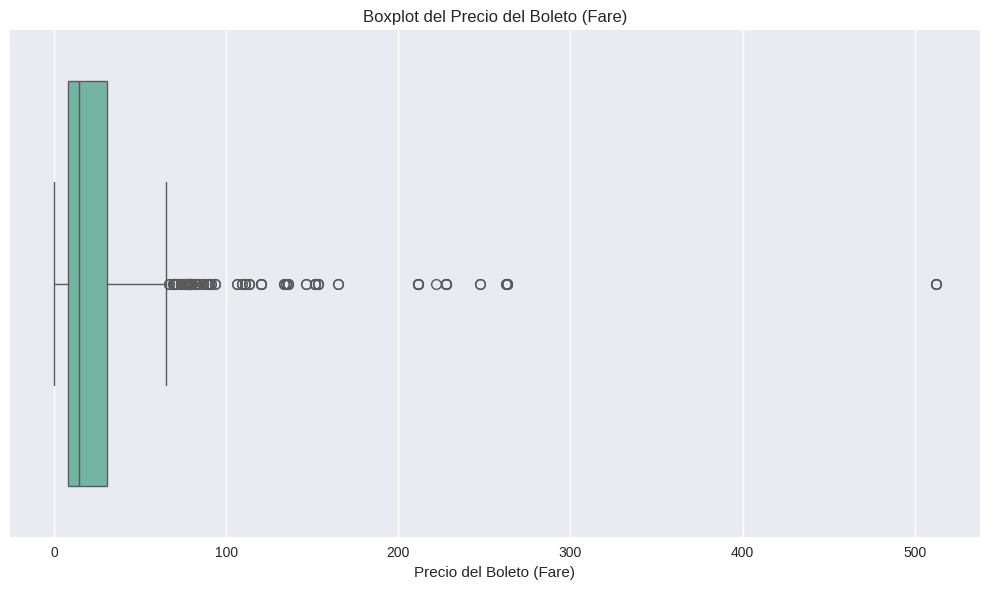

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titan, x='Fare')
plt.title('Boxplot del Precio del Boleto (Fare)')
plt.xlabel('Precio del Boleto (Fare)')
plt.tight_layout()
plt.show()

- La gráfica muestra la distribución del precio de los boletos mediante un boxplot, destacando la mediana, el rango intercuartílico y los valores extremos.
- Se observa una gran cantidad de outliers con tarifas muy altas, lo que indica que algunos pasajeros pagaron precios significativamente superiores al promedio.
- Esta dispersión sugiere una fuerte desigualdad económica entre los pasajeros, lo cual puede influir en su acceso a recursos y, por tanto, en su probabilidad de supervivencia.


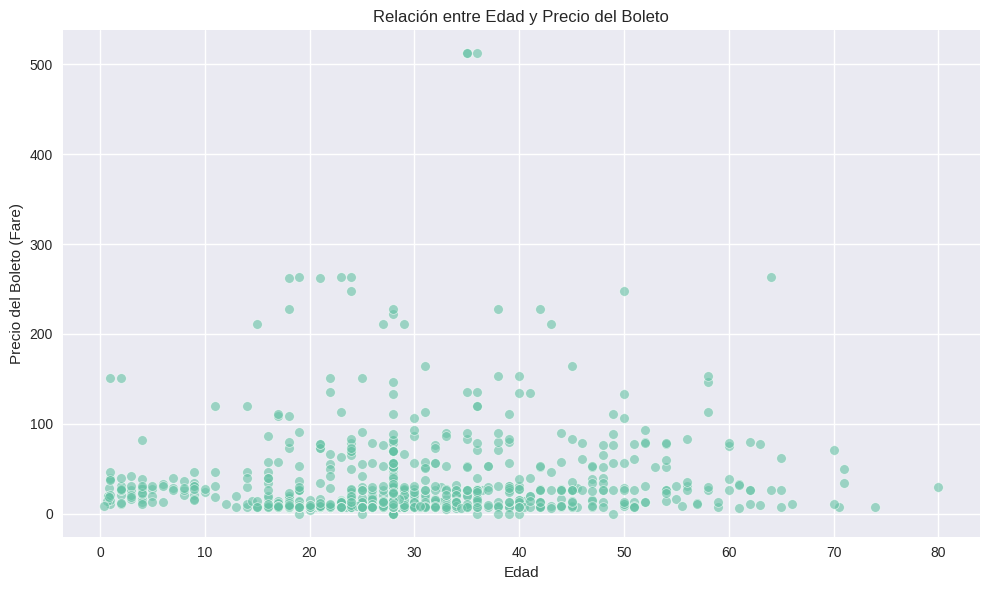

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titan, x='Age', y='Fare', alpha=0.6)
plt.title('Relación entre Edad y Precio del Boleto')
plt.xlabel('Edad')
plt.ylabel('Precio del Boleto (Fare)')
plt.tight_layout()
plt.show()


- La gráfica muestra un diagrama de dispersión que relaciona la edad de los pasajeros con el precio que pagaron por su boleto.

- Se observa que la mayoría de los pasajeros, sin importar la edad, pagaron tarifas inferiores a 100 unidades, aunque hay algunos casos con precios elevados en distintas edades.

- Esto indica que el costo del boleto no está directamente ligado a la edad, pero sí puede reflejar diferencias de clase o tipo de cabina, lo cual es relevante para el análisis de supervivencia y segmentación socioeconómica.

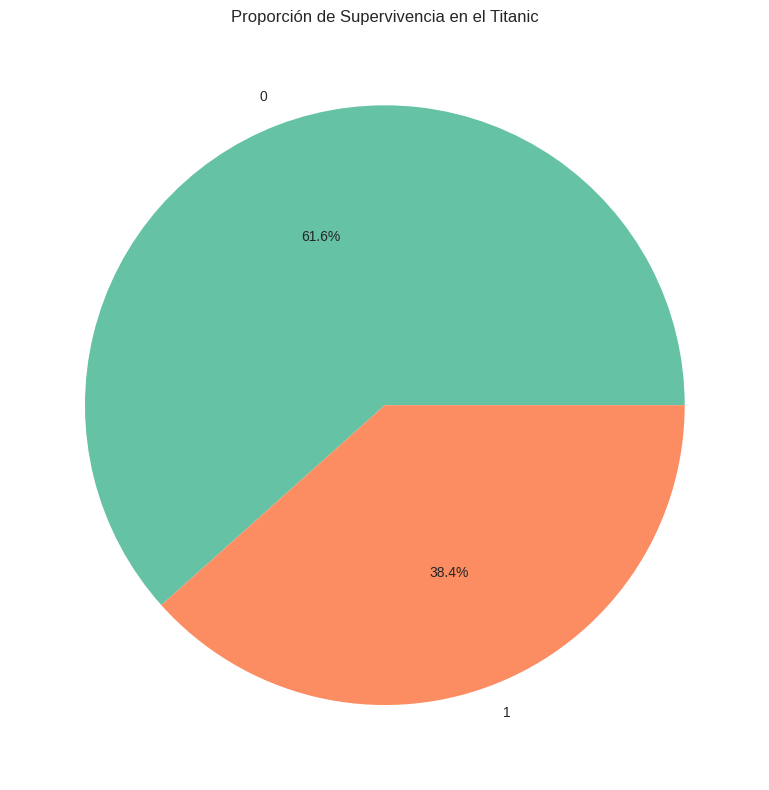

In [ ]:
plt.figure(figsize=(8, 8))
df_titan['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Supervivencia en el Titanic')
plt.ylabel('')
plt.tight_layout()
plt.show()

- La gráfica muestra la proporción de pasajeros que sobrevivieron (38.4%) frente a los que no sobrevivieron (61.6%).

- Se observa que la mayoría de los pasajeros fallecieron, lo que refleja la gravedad del desastre.

- Esta distribución es clave para entender el desequilibrio en el resultado y orientar el análisis hacia los factores que influyeron en la supervivencia.


PASO 6: CONVERSION DE VARIABLES A NUMERO

In [ ]:
# Identificar columnas categóricas
cat_cols = df_titan.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(cat_cols)}")

# Aplicar LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    try:
        df_titan[col] = le.fit_transform(df_titan[col])
    except:
        pass

# Verificar conversión
print("\nTipos después de label encoding:\n", df_titan.dtypes)

Columnas categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Tipos después de label encoding:
 PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object


PASO 7: NORMALIZACION

In [ ]:
print("=== ANTES DE NORMALIZACIÓN ===")
print(df_titan.describe().T)

scaler = MinMaxScaler()
cols_to_scale = df_titan.columns

df_scaled = pd.DataFrame(
    scaler.fit_transform(df_titan[cols_to_scale]),
    columns=cols_to_scale
)

print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(df_scaled.describe().T)

=== ANTES DE NORMALIZACIÓN ===
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Name         891.0  445.000000  257.353842  0.00  222.5000  445.0000  667.5   
Sex          891.0    0.647587    0.477990  0.00    0.0000    1.0000    1.0   
Age          891.0   29.361582   13.019697  0.42   22.0000   28.0000   35.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Ticket       891.0  338.528620  200.850657  0.00  158.5000  337.0000  519.5   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   
Cabin        891.0   53.639731   23.568293  0.00   47.0000   47.0000   47.0   
Embarked     891.0   

**¿Por qué es importante normalizar los datos?**

La normalización es importante porque permite que todas las variables del dataset estén en una misma escala, evitando que aquellas con valores numéricamente más grandes dominen o distorsionen el comportamiento del modelo. Además, facilita que los algoritmos de machine learning converjan más rápido y de manera estable, mejorando su rendimiento y precisión. Normalizar también ayuda a comparar variables de forma justa y evita sesgos derivados de diferencias en rangos o unidades.

PASO 8: CORRELACION

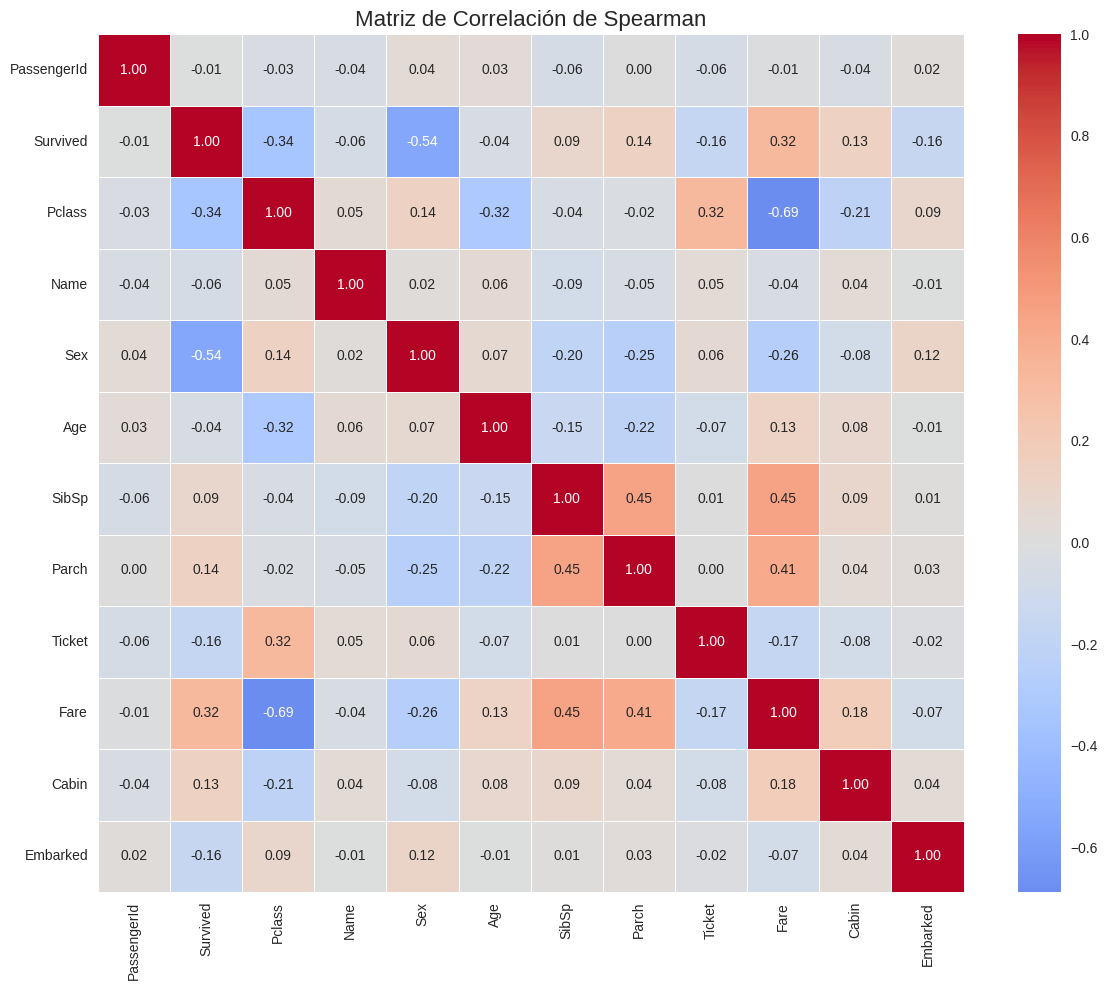


=== CORRELACIONES MÁS FUERTES ===
Pclass <-> Fare: -0.688
Survived <-> Sex: -0.543


In [ ]:
corr = df_scaled.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Matriz de Correlación de Spearman", fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== CORRELACIONES MÁS FUERTES ===")

strong = []
cols = corr.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(corr.iloc[i, j]) > 0.5:
            strong.append((cols[i], cols[j], corr.iloc[i, j]))

strong_sorted = sorted(strong, key=lambda x: abs(x[2]), reverse=True)

for var1, var2, value in strong_sorted:
    print(f"{var1} <-> {var2}: {value:.3f}")

 Correlaciones más fuertes
- Pclass ↔ Fare: -0.688
Existe una fuerte correlación negativa entre la clase del pasajero y el precio del boleto. Esto significa que los pasajeros de primera clase (Pclass = 1) pagaron tarifas más altas, mientras que los de tercera clase (Pclass = 3) pagaron menos. Esta relación refleja diferencias socioeconómicas claras, que pueden influir en el acceso a recursos y en la probabilidad de supervivencia.
- Survived ↔ Sex: -0.543
La correlación negativa indica que el sexo masculino (codificado como 1) está asociado con menor probabilidad de supervivencia. En otras palabras, las mujeres tuvieron más posibilidades de sobrevivir que los hombres, lo cual concuerda con las políticas de evacuación del Titanic (“mujeres y niños primero”).


PASO 9: TEST DE NORMALIDAD

In [ ]:
# Función para realizar el test de normalidad Shapiro-Wilk
def test_normalidad(df, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            data = df[col].dropna()

            if len(data) >= 3:
                stat, p_value = shapiro(data)
                conclusion = "NORMAL" if p_value > alpha else "NO NORMAL"

                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {conclusion}\n")
test_normalidad(df_scaled)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

PassengerId:
  Estadístico W: 0.9548
  P-valor: 0.0000
  Conclusión: NO NORMAL

Survived:
  Estadístico W: 0.6167
  P-valor: 0.0000
  Conclusión: NO NORMAL

Pclass:
  Estadístico W: 0.7183
  P-valor: 0.0000
  Conclusión: NO NORMAL

Name:
  Estadístico W: 0.9548
  P-valor: 0.0000
  Conclusión: NO NORMAL

Sex:
  Estadístico W: 0.6041
  P-valor: 0.0000
  Conclusión: NO NORMAL

Age:
  Estadístico W: 0.9541
  P-valor: 0.0000
  Conclusión: NO NORMAL

SibSp:
  Estadístico W: 0.5130
  P-valor: 0.0000
  Conclusión: NO NORMAL

Parch:
  Estadístico W: 0.5328
  P-valor: 0.0000
  Conclusión: NO NORMAL

Ticket:
  Estadístico W: 0.9465
  P-valor: 0.0000
  Conclusión: NO NORMAL

Fare:
  Estadístico W: 0.5219
  P-valor: 0.0000
  Conclusión: NO NORMAL

Cabin:
  Estadístico W: 0.5546
  P-valor: 0.0000
  Conclusión: NO NORMAL

Embarked:
  Estadístico W: 0.5824
  P-valor: 0.0000
  Conclusión: NO NORMAL



Tras aplicar el test de Shapiro‑Wilk a todas las variables del dataset, se encontró que ninguna de ellas sigue una distribución normal, ya que todas presentan un p‑valor menor a 0.05. Esto indica que los datos no cumplen con el supuesto de normalidad y, por lo tanto, no se ajustan a una distribución gaussiana.


PASO 10: PREGUNTA DE INVESTIGACION

¿Es posible predecir si un pasajero del Titanic sobrevivió usando características como su clase socioeconómica (Pclass), sexo (Sex), edad (Age), número de familiares a bordo (SibSp, Parch), tarifa pagada (Fare) y puerto de embarque (Embarked), y con qué nivel de precisión puede hacerlo un modelo de clasificación?

PASO 11: EJERCICIO DE PREDICCION

Precisión del modelo: 79.89%

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       110
         1.0       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



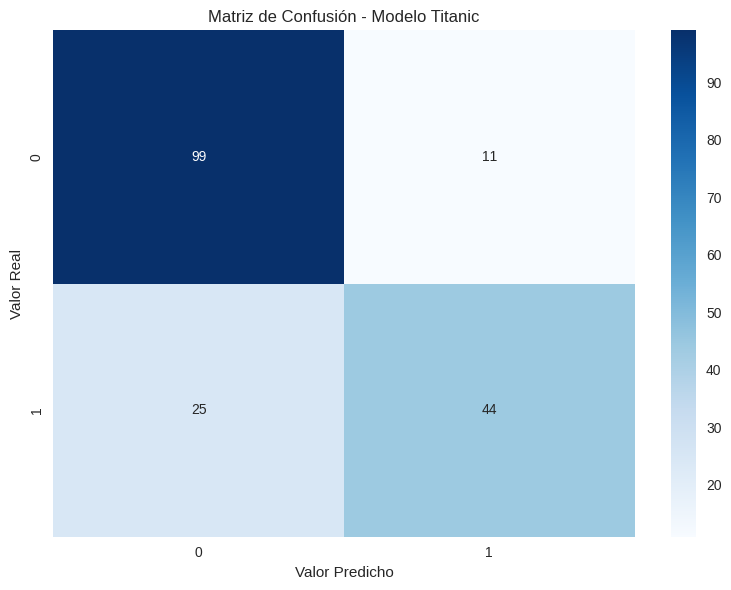

In [ ]:
# PASO 11: MODELO DE CLASIFICACIÓN PARA RESPONDER LA PREGUNTA DEL PASO 10

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir variable objetivo y datos de trabajo
datos_trabajo = df_scaled.copy()
variable_objetivo = 'Survived'

# Variables predictoras
X = datos_trabajo.drop(variable_objetivo, axis=1)
y = datos_trabajo[variable_objetivo]

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo de Clasificación: Regresión Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:.2f}%")

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Modelo Titanic')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()


¿Qué tan bueno es el modelo?

El modelo alcanza una precisión del 79.8%, lo cual indica un buen desempeño general.

- Para la clase 0 (no sobrevivió), el modelo tiene una precisión de 0.80 y una recall de 0.90, lo que significa que identifica correctamente la mayoría de los que no sobrevivieron.
- Para la clase 1 (sobrevivió), la recall baja a 0.64, lo que indica que el modelo tiene más dificultad para detectar correctamente a los sobrevivientes.
- El F1-score promedio es 0.78, lo que refleja un buen equilibrio entre precisión y recall.

¿Qué variables son más importantes?

Según la matriz de correlación y el análisis previo, las variables más influyentes son:
- Pclass: fuertemente correlacionada con el precio del boleto y la supervivencia.
- Sex: muestra una clara relación con la probabilidad de sobrevivir (mujeres con mayor tasa de supervivencia).
- Fare: refleja el nivel socioeconómico, lo cual influye en el acceso a recursos durante el desastre.

¿Responde satisfactoriamente la pregunta de investigación?

- Sí. El modelo logra predecir la supervivencia con una precisión cercana al 80%, lo que permite identificar patrones relevantes en los datos del Titanic. Aunque no es perfecto, ofrece una base sólida para entender qué factores influyeron en la supervivencia.

¿Qué limitaciones tiene el modelo?
- Desbalance en la predicción de la clase 1: menor recall para los sobrevivientes.
- Datos no normales: todas las variables fallaron el test de normalidad, lo que limita el uso de ciertos métodos estadísticos.
- Presencia de outliers: especialmente en variables como Fare, que pueden afectar la estabilidad del modelo.
- Codificación simplificada: el uso de LabelEncoder puede perder información en variables categóricas con múltiples niveles o sin orden lógico.
